 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [14]:
whale_data = pd.read_csv('whale_returns.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_data = pd.read_csv('algo_returns.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_data = pd.read_csv('sp_tsx_history.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [15]:
# Reading whale returns
whale_data.sort_index(inplace=True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [16]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [17]:
# Drop nulls
whale_data.dropna(inplace=True)
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [18]:
# Reading algorithmic returns
algo_data.sort_index(inplace=True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [19]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [23]:
# Drop nulls
algo_data.dropna(inplace=True)
algo_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [22]:
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [24]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_data.sort_index(inplace=True)
sp_tsx_data.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [32]:
# Check Data Types
sp_tsx_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1818 non-null   float64
dtypes: float64(1)
memory usage: 28.4 KB


In [120]:
# Fix Data Types
sp_tsx_data["Close"] = sp_tsx_data["Close"].str.replace("$","")
sp_tsx_data["Close"] = sp_tsx_data["Close"].str.replace(",","")
sp_tsx_data.head()

AttributeError: Can only use .str accessor with string values!

In [35]:
sp_tsx_data['Close'].dtype
sp_tsx_data['Close'] = sp_tsx_data['Close'].astype('float')
sp_tsx_data['Close'].dtype

dtype('float64')

In [39]:
# Calculate Daily Returns
sp_daily_return = sp_tsx_data.pct_change()
sp_daily_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [40]:
# Drop nulls
sp_daily_return.dropna(inplace=True)

In [42]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_return = sp_daily_return.rename(columns={'Close':'S&P TSX 60'})
sp_daily_return.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [43]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([whale_data,algo_data,sp_daily_return], axis="columns", join="inner")
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

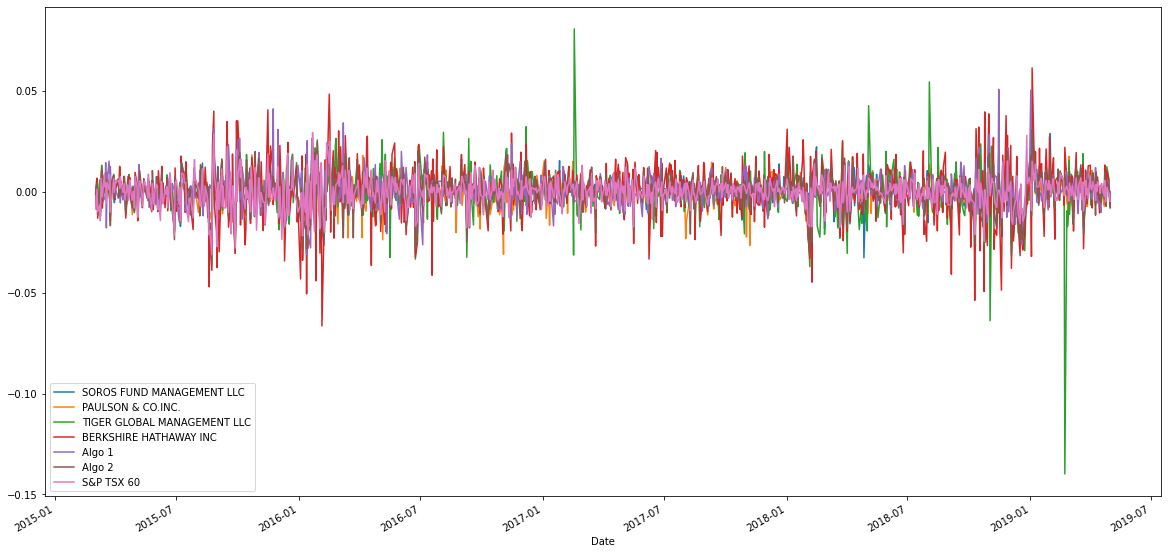

In [44]:
# Plot daily returns of all portfolios
combined_data.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

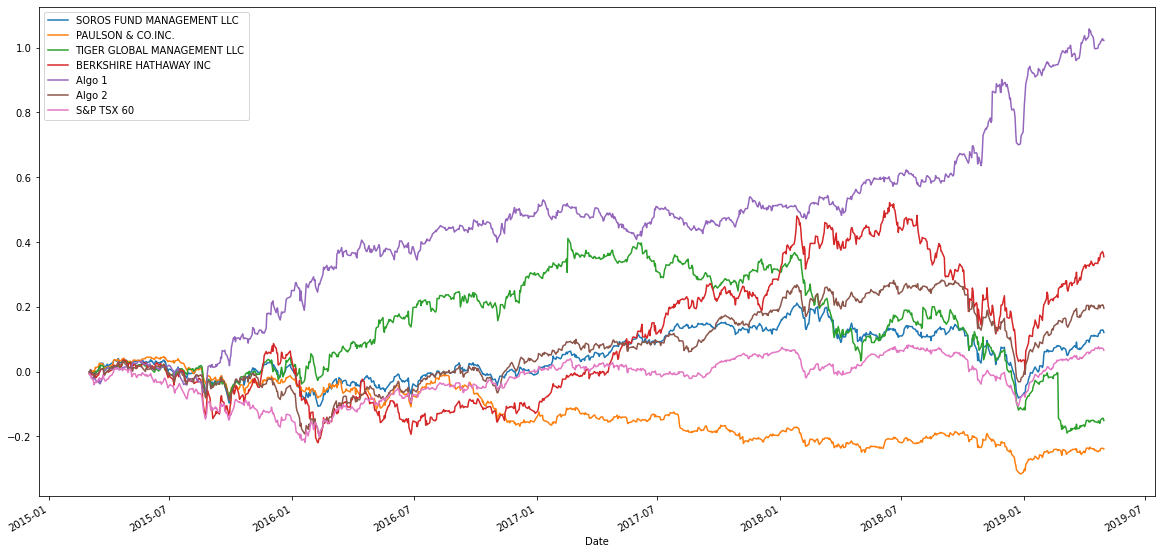

In [45]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_data).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

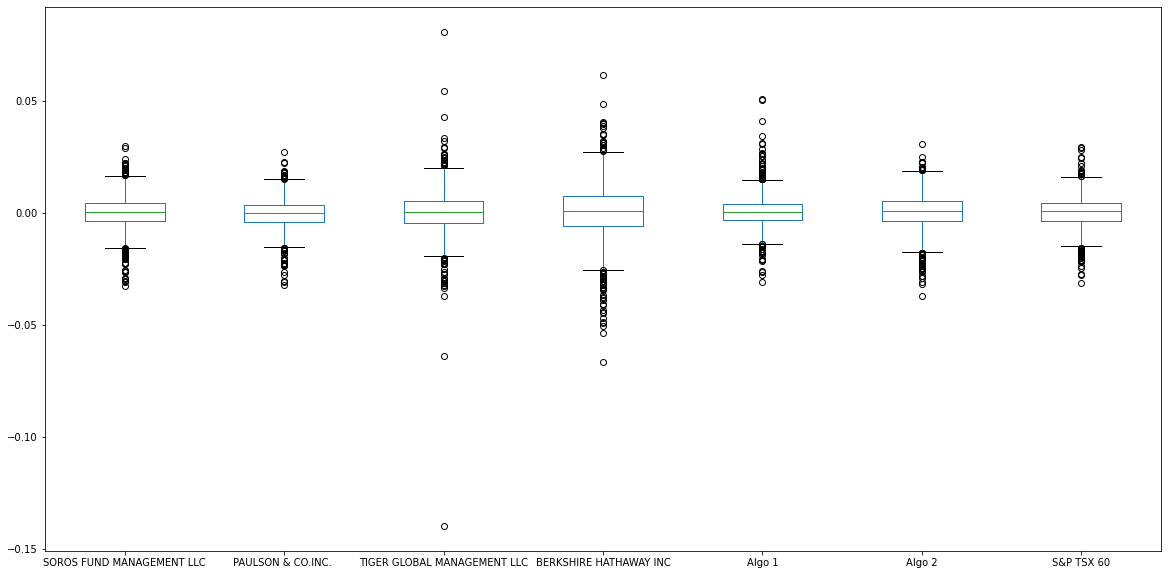

In [46]:
# Box plot to visually show risk
combined_data.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [47]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_data.std()
daily_std.head()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [61]:
# Calculate  the daily standard deviation of S&P TSX 60
SP_daily_std = daily_std['S&P TSX 60']
# Determine which portfolios are riskier than the S&P TSX 60
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [56]:
#Bershire, Tiger, Algo 1 & 2, and Soros have greater daily standard deviation. Hence, they are riskier than S&P TSX 60.

### Calculate the Annualized Standard Deviation

In [60]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std*np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX 60                     0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

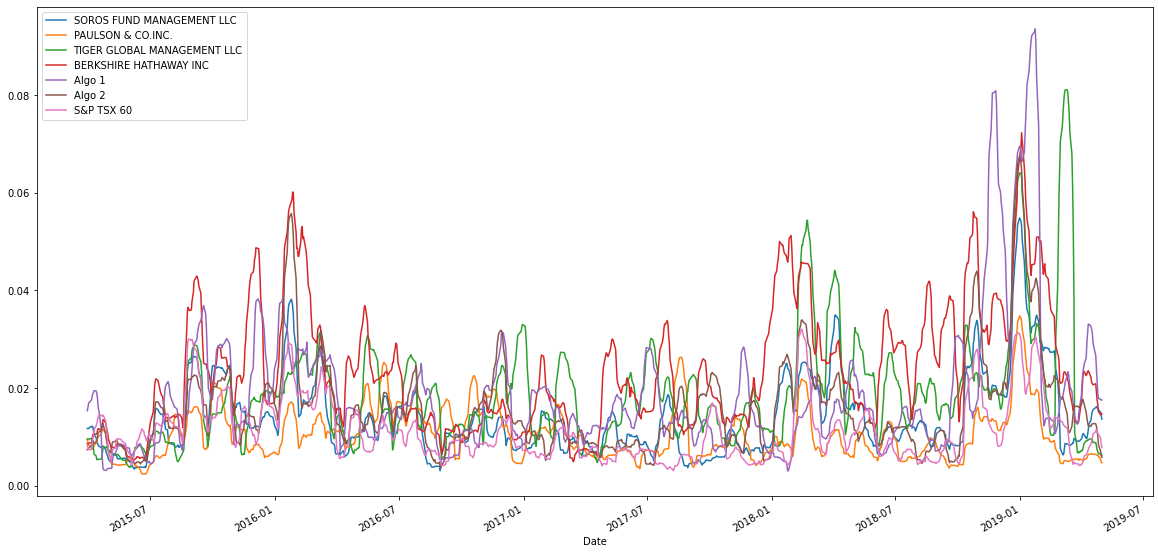

In [63]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling21 = cumulative_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling21.plot(figsize=(20,10))

### Calculate and plot the correlation

In [64]:
# Calculate the correlation
correlation = cumulative_returns.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,-0.599250,0.428731,0.879331,0.419924,0.898351,0.809598
PAULSON & CO.INC.,-0.599250,1.000000,-0.167546,-0.710741,-0.876459,-0.736731,-0.604204
TIGER GLOBAL MANAGEMENT LLC,0.428731,-0.167546,1.000000,0.064462,0.047300,0.242755,0.370814
BERKSHIRE HATHAWAY INC,0.879331,-0.710741,0.064462,1.000000,0.524672,0.920725,0.720103
Algo 1,0.419924,-0.876459,0.047300,0.524672,1.000000,0.590275,0.528311
Algo 2,0.898351,-0.736731,0.242755,0.920725,0.590275,1.000000,0.886327
S&P TSX 60,0.809598,-0.604204,0.370814,0.720103,0.528311,0.886327,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

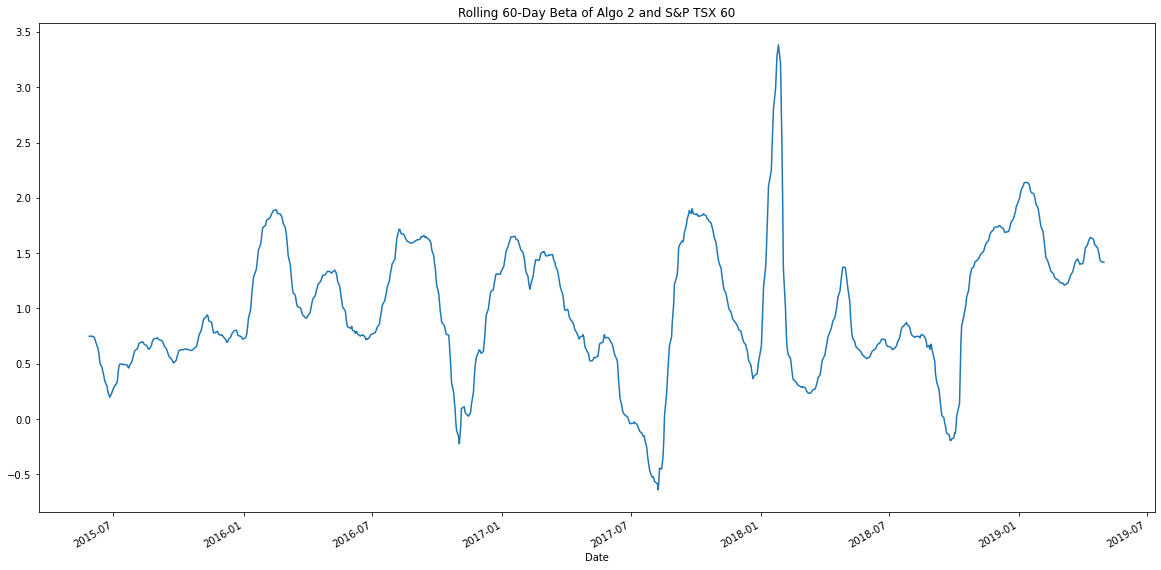

In [66]:
# Calculate covariance of a single portfolio
rolling_covariance = cumulative_returns['S&P TSX 60'].rolling(window=60).cov(cumulative_returns['Algo 2'])
# Calculate variance of S&P TSX
rolling_variance = cumulative_returns['S&P TSX 60'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance/rolling_variance
# Plot beta trend
ax = rolling_beta.plot(figsize=(20,10), title="Rolling 60-Day Beta of Algo 2 and S&P TSX 60")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

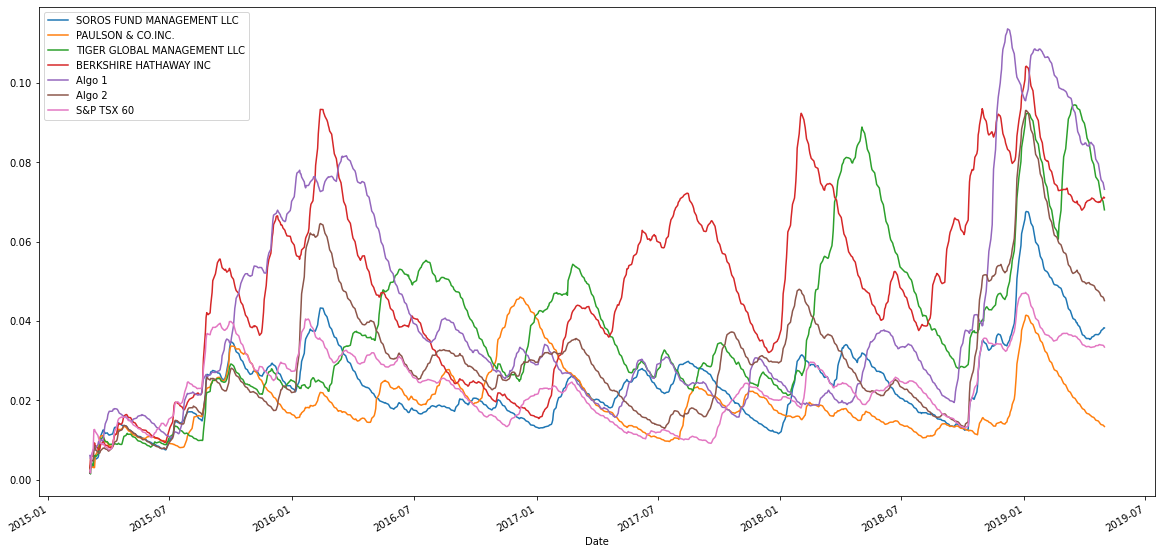

In [67]:
# Use `ewm` to calculate the rolling window
cumulative_returns.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [68]:
# Annualized Sharpe Ratios
sharpe_ratios = (cumulative_returns.mean()*252)/(
    cumulative_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      11.402242
PAULSON & CO.INC.             -22.381050
TIGER GLOBAL MANAGEMENT LLC    15.001554
BERKSHIRE HATHAWAY INC          8.214824
Algo 1                         27.120044
Algo 2                          9.942376
S&P TSX 60                     -5.027228
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

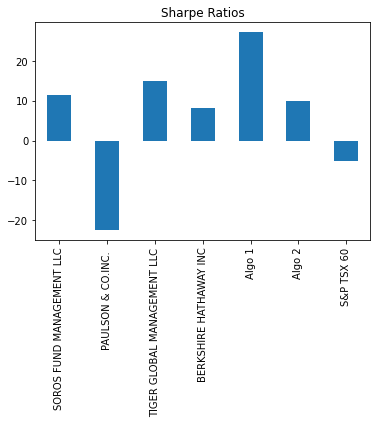

In [69]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar',title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 trumps the returns of both market and whales portfolios. Algo 2 beats the market and 2 whales but underperforms slightly compared with SOROS & TIGER.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [89]:
# Reading data from 1st stock
SHOP_data = pd.read_csv('shop_historical.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
SHOP_data = SHOP_data.sort_index()
SHOP_data.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [90]:
# Reading data from 2nd stock
OTEX_data = pd.read_csv('otex_historical.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
OTEX_data = OTEX_data.sort_index()
OTEX_data.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [91]:
# Reading data from 3rd stock
L_data = pd.read_csv('l_historical.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
L_data = L_data.sort_index()
L_data.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [94]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([SHOP_data,OTEX_data,L_data],axis="rows", join="inner")
all_stocks.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [95]:
# Reset Date index
all_stocks = all_stocks.reset_index()
all_stocks.head()

,Date,Symbol,Close
0,2018-01-02,SHOP,132.06
1,2018-01-03,SHOP,135.15
2,2018-01-04,SHOP,137.46
3,2018-01-05,SHOP,137.26
4,2018-01-08,SHOP,139.51


In [96]:
# Reorganize portfolio data by having a column per symbol
portfolio = all_stocks.pivot_table(values="Close",index="Date",columns="Symbol")
portfolio.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [97]:
# Calculate daily returns
daily_returns = portfolio.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna().copy()
# Display sample data
daily_returns.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [101]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [106]:
# Join your returns DataFrame to the original returns DataFrame
combined_data["Custom"] = portfolio_returns
combined_data.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Custom
Date,,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183,0.026937
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703,-0.000079


In [107]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_data = combined_data.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [108]:
# Calculate the annualized `std`
risk = combined_data.std()*np.sqrt(252)
risk

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX 60                     0.099121
Custom                         0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

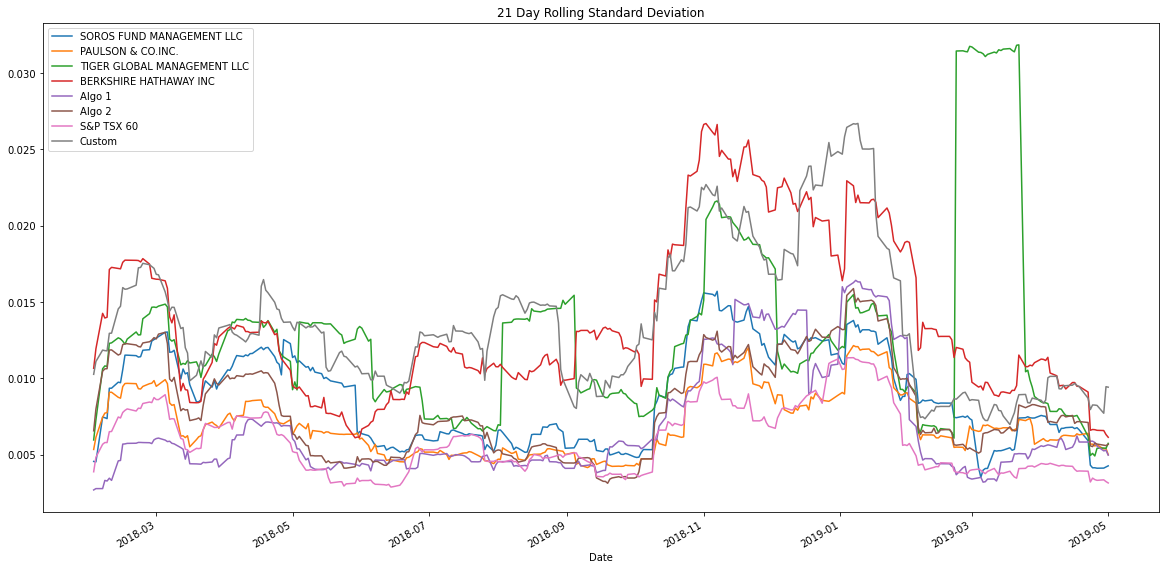

In [109]:
# Calculate rolling standard deviation
rolling_std_dev = combined_data.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_dev.plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [110]:
# Calculate and plot the correlation
df = combined_data.corr()
df.style.background_gradient(cmap="hot")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
S&P TSX 60,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
Custom,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Custom Portfolio Beta'}, xlabel='Date'>

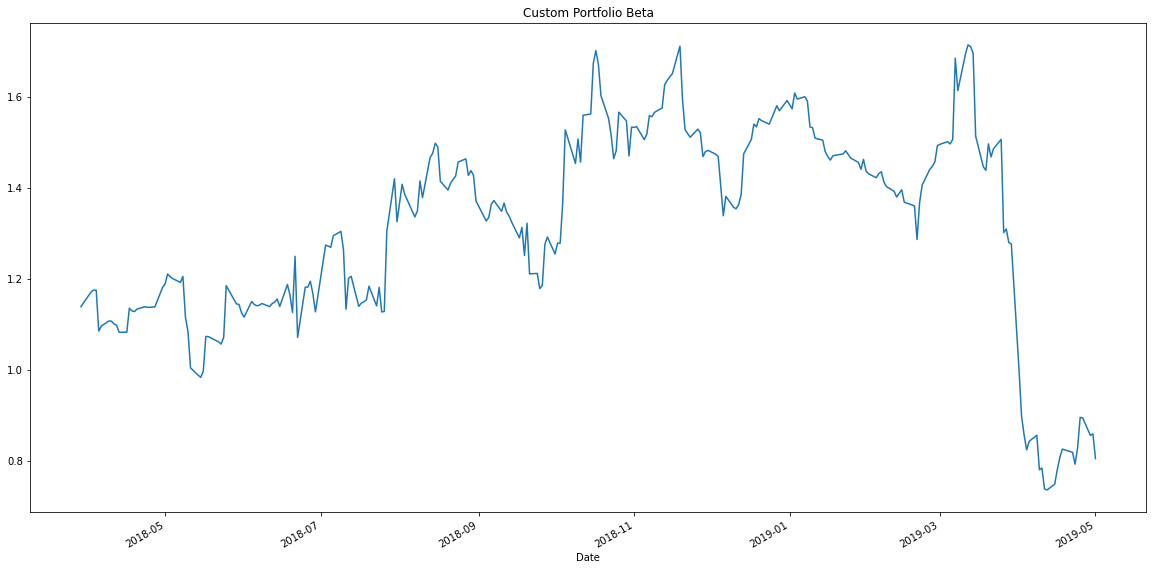

In [117]:
# Calculate and plot Beta
covariance = combined_data["Custom"].rolling(window=60).cov(combined_data["S&P TSX 60"])
variance = combined_data["S&P TSX 60"].rolling(60).var()
beta = (covariance/variance)
beta.plot(figsize=(20,10), title="Custom Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [118]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (combined_data.mean()*252)/(combined_data.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX 60                     0.034651
Custom                         1.564547
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

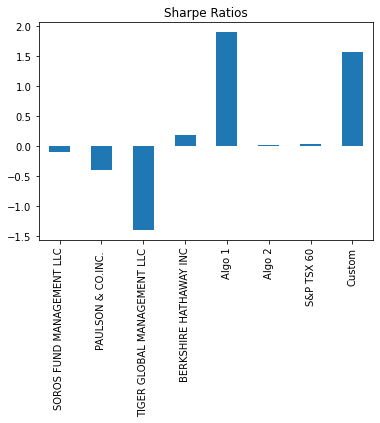

In [119]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

The portfolio outperformed majority of the index except for TIGER. Mainly due to the tech surge during the last few years. SHOP especially carried majority of the growth recently growing several times since 2018 price per share.